<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Kwasniewska/Regresja_czesc2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
from numpy import mean
from numpy import std
from numpy import absolute
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_california_housing

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

In [54]:
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names)
X = pd.DataFrame(data = housing.data, columns = housing.feature_names)
print(X.head())
y = housing.target

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [55]:
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=2652124)
lin = LinearRegression()
cv_scores_linear = cross_val_score(lin, X, y, cv=rkf,scoring='neg_mean_absolute_error')

In [56]:
xpol2 = PolynomialFeatures(2)
x2 = xpol2.fit_transform(X)
cv_scores_pol2 = cross_val_score(lin, x2, y, cv=rkf,scoring='neg_mean_absolute_error')

In [57]:
xpol3 = PolynomialFeatures(3)
x3 = xpol3.fit_transform(X)
cv_scores_pol3 = cross_val_score(lin, x3, y, cv=rkf,scoring='neg_mean_absolute_error')

In [58]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
knn_cv = KNeighborsRegressor(n_neighbors=3)
cv_scores_knn = cross_val_score(knn_cv, X, y, cv=rkf)

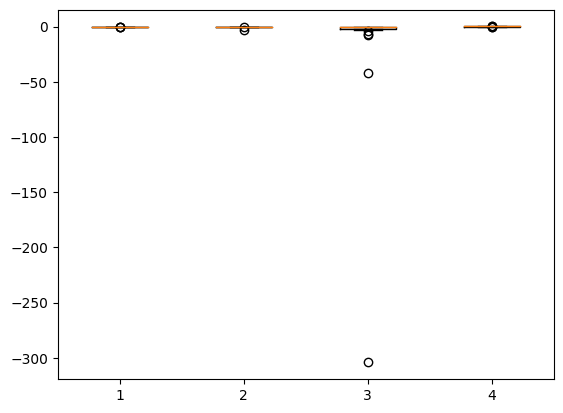

In [61]:
plt.boxplot([cv_scores_linear, cv_scores_pol2, cv_scores_pol3, cv_scores_knn])
plt.show()

[-0.53286851 -0.52878709 -0.53770585 -0.52744413 -0.5316177  -0.51838361
 -0.54599058 -0.54441511 -0.52572175 -0.52433106 -0.53594667 -0.5264349
 -0.52975192 -0.53645394 -0.52883193 -0.52756796 -0.53376565 -0.54080917
 -0.52410467 -0.5328948  -0.53331152 -0.54714239 -0.52155503 -0.53514727
 -0.53577333]
Mean MEA -0.532


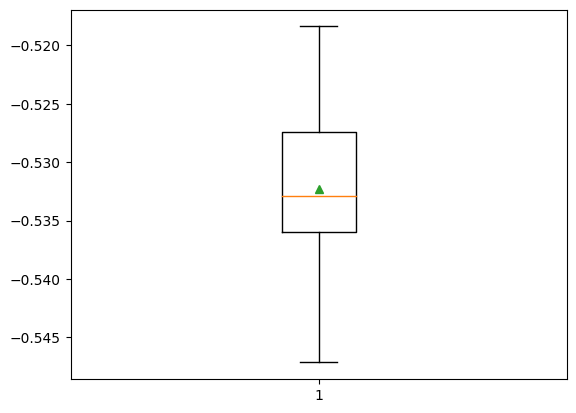

In [63]:
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', LinearRegression())])
model = TransformedTargetRegressor(regressor=LinearRegression())
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)
scores_tv = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv)
scores = absolute(scores_tv)
s_mean = mean(scores_tv)
print(scores_tv)
print('Mean MEA %.3f' % (s_mean))
plt.boxplot(scores_tv, showmeans=True)
plt.show()